In [6]:
import matplotlib.pyplot as plt

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf

In [2]:
dp=p = yf.download('ETH-USD')

[*********************100%%**********************]  1 of 1 completed


In [3]:
dp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
import numpy as np
import math
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


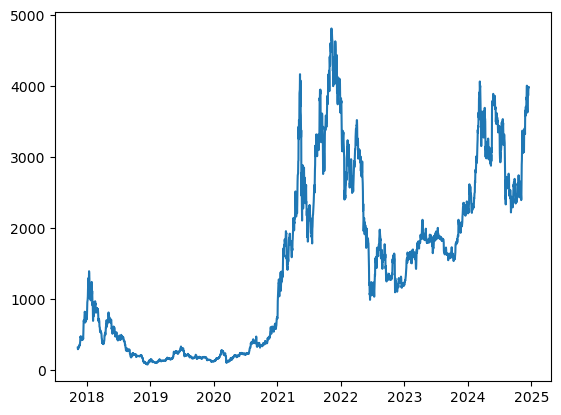

In [7]:
plt.plot(dp.index, dp['Adj Close'])
plt.show()

In [9]:
upto =int(len(dp)*0.9)
print(upto)

2336


In [10]:
# Ensure the data has a datetime index
dp = dp.asfreq('D')  # Set the frequency explicitly to daily

# Split into train and test data
train_data = dp['Adj Close'].iloc[:2336]  # First 2336 rows for training
test_data = dp['Adj Close'].iloc[2336:]  # Remaining rows for testing

In [15]:
#Building Arima Model Forecasting Model
runup = len(test_data)
model_predictions=[]
yhat=[]
for i in range(runup):
    model = ARIMA(train_data,order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    
#     actual_result[] = actual_result.append(test_data[i])
                  

In [16]:
print(forecast)

2024-04-02    3511.640696
2024-04-03    3518.895655
2024-04-04    3516.069316
2024-04-05    3504.572777
2024-04-06    3513.612930
                 ...     
2024-12-13    3512.328913
2024-12-14    3512.328913
2024-12-15    3512.328913
2024-12-16    3512.328913
2024-12-17    3512.328913
Freq: D, Name: predicted_mean, Length: 260, dtype: float64


In [106]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2336
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13403.275
Date:                Tue, 17 Dec 2024   AIC                          26818.550
Time:                        10:41:28   BIC                          26853.084
Sample:                    11-09-2017   HQIC                         26831.131
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.011     -6.212      0.000      -0.092      -0.048
ar.L2          0.0124      0.010      1.231      0.218      -0.007       0.032
ar.L3          0.0496      0.011      4.551      0.0

/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, 

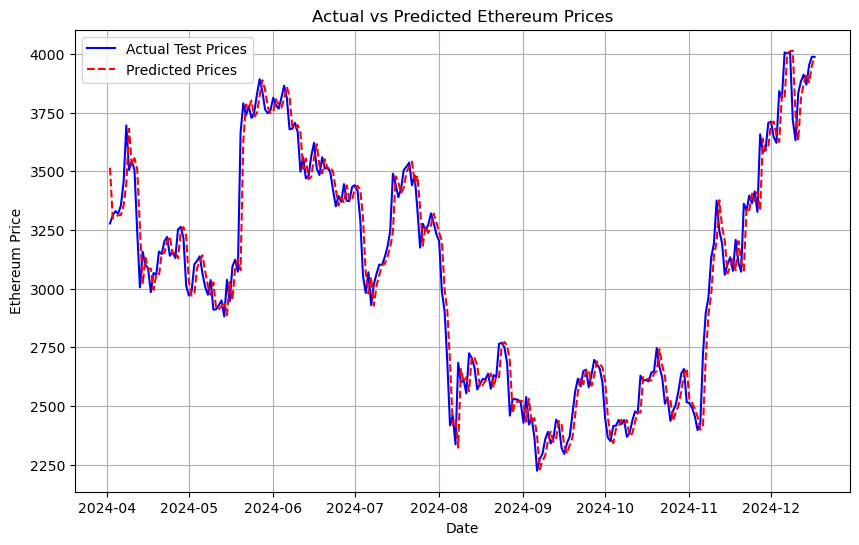

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Initialize predictions list
predictions = []

# Split the data
train_data = dp['Adj Close'].iloc[:2336]  # Define train_data outside the loop
test_data = dp['Adj Close'].iloc[2336:]

# Ensure indices are consistent
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

# Rolling Forecast with ARIMA
for i in range(len(test_data)):
    # Fit ARIMA model on current train_data
    model = ARIMA(train_data, order=(4, 1, 0))
    model_fit = model.fit()

    # Forecast the next step
    output = model_fit.forecast(steps=1)
    yhat = output[0]  # Extract the scalar forecasted value
    predictions.append(yhat)

    # Update the training data with the actual test value
    real_result = test_data.iloc[i]
    train_data = pd.concat([train_data, pd.Series(real_result, index=[test_data.index[i]])])

# Convert predictions to a pandas Series
predictions = pd.Series(predictions, index=test_data.index)



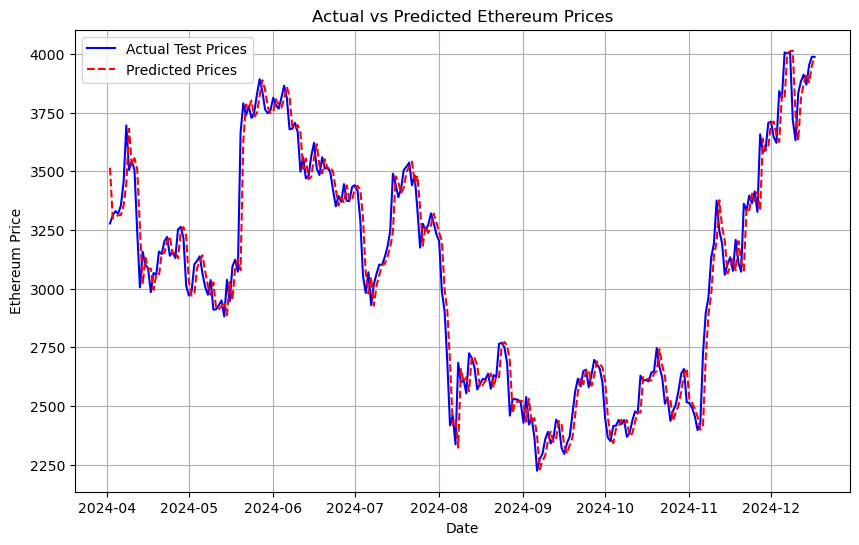

In [40]:
# Plot actual test data and predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Test Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', linestyle='--', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Ethereum Price')
plt.title('Actual vs Predicted Ethereum Prices')
plt.legend()
plt.grid()
plt.show()


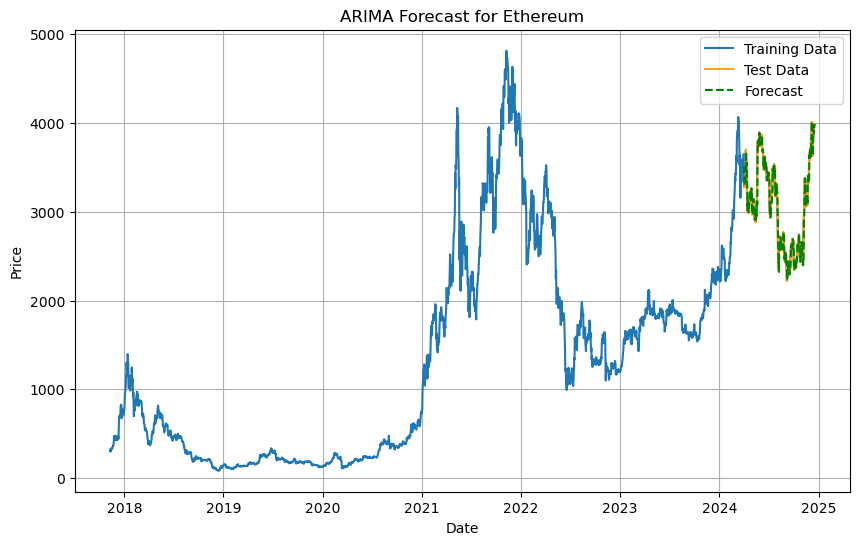

In [39]:
plt.figure(figsize=(10, 6))

# Plot the training data
plt.plot(train_data.index, train_data, label='Training Data')

# Plot the test data
plt.plot(test_data.index, test_data, label='Test Data', color='orange')

# Plot the forecasted predictions
plt.plot(test_data.index, predictions, label='Forecast', linestyle='--', color='green')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast for Ethereum')
plt.legend()
plt.grid()
plt.show()


In [41]:
print(predictions)

Date
2024-04-02    3514.672081
2024-04-03    3298.662150
2024-04-04    3305.497579
2024-04-05    3312.607684
2024-04-06    3313.092050
                 ...     
2024-12-13    3872.454305
2024-12-14    3916.019538
2024-12-15    3878.280183
2024-12-16    3949.010483
2024-12-17    3985.876306
Freq: D, Length: 260, dtype: float64


In [42]:
print(test_data)

Date
2024-04-02    3277.234619
2024-04-03    3311.441895
2024-04-04    3330.040527
2024-04-05    3318.885254
2024-04-06    3354.183838
                 ...     
2024-12-13    3911.205322
2024-12-14    3868.405273
2024-12-15    3951.941162
2024-12-16    3987.480957
2024-12-17    3986.963623
Freq: D, Name: Adj Close, Length: 260, dtype: float64


In [44]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2595
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -15006.237
Date:                Tue, 17 Dec 2024   AIC                          30022.474
Time:                        12:52:30   BIC                          30051.779
Sample:                    11-09-2017   HQIC                         30033.094
                         - 12-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0559      0.011     -5.127      0.000      -0.077      -0.035
ar.L2          0.0154      0.010      1.496      0.135      -0.005       0.036
ar.L3          0.0386      0.011      3.543      0.0